In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.optimize import minimize

# load MATLAB files
from scipy.io import loadmat

from sklearn.preprocessing import PolynomialFeatures

In [2]:
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

In [3]:
def costFunctionReg(theta, X, y, reg):
    m = len(X)
    theta = np.c_[theta]
    
    z = X.dot(theta) # X * theta
    h = sigmoid(z) # Hypothesis
    
    cost = (1.0 / m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h)))
    cost += (reg / (2 * m)) * (theta.T.dot(theta) - theta[0] ** 2)
    
    return cost.flatten()[0]

In [4]:
def gradientReg(theta, X, y, reg):
    m = len(X)
    theta = np.c_[theta]
    
    zeroFirst = np.ones((len(theta), 1))
    zeroFirst[0, 0] = 0
    
    z = X.dot(theta) # X * theta
    h = sigmoid(z) # Hypothesis
    
    grad = (1.0 / m) * (X.T.dot(h - y))
    grad += (reg / m) * theta * zeroFirst
    
    return grad.flatten()

In [5]:
def oneVsAll(X, y, num_labels, reg):
    init_theta = np.zeros(X.shape[1])
    THETA = np.zeros((num_labels, X.shape[1]))
    
    opt = {
        'maxiter': 400
    }
    
    for i in range(1,num_labels+1):
        result = minimize(
            costFunctionReg, 
            init_theta, 
            args=(X,(y == i)*1,reg), # (y == 1) * 1 will return an array of 0s and 1s,
            method="TNC",            #     in order to filter the samples to only the 
            jac=gradientReg,         #     set for the current digit
            options=opt
        )

        model = result.x
        
        THETA[i - 1] = model
        
    return THETA

In [6]:
def predictOneVsAll(theta, X):
    A = sigmoid(X.dot(theta.T))
    return np.argmax(A, axis=1) + 1

In [7]:
def predict(theta1, theta2, X):
    A1 = np.c_[np.ones(X.shape[0]), X]
    
    A2 = sigmoid(A1.dot(theta1.T))
    A2 = np.c_[np.ones(A2.shape[0]), A2]
    
    A3 = sigmoid(A2.dot(theta2.T))
    
    return np.argmax(A3, axis=1) + 1

In [8]:
# Load Raw Data
data = loadmat('./data/ex3data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [9]:
# Initialize Variables
y = data['y']

X = np.c_[np.ones((data['X'].shape[0], 1)), data['X']]

print('X Dim: {}'.format(X.shape))
print('y Dim: {}'.format(y.shape))

X Dim: (5000, 401)
y Dim: (5000, 1)


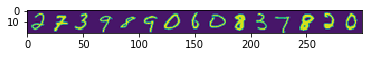

In [10]:
sampleIndex = np.random.choice(X.shape[0], 15);
plt.imshow(X[sampleIndex,1:].reshape(-1,20).T)

In [12]:
%%time

# One vs All Logistic Regression Performance
theta = oneVsAll(X, y, 10, 0.1)

prediction = predictOneVsAll(theta, X)

print("Training Accuracy: {0:6.3f} %".format(np.mean(prediction == y.flatten())*100))

Training Accuracy: 96.460 %
Wall time: 3.87 s


In [14]:
# Load Raw Data
data = loadmat('./data/ex3weights.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])

In [16]:
%%time

# Neural Network Performance
Theta1 = data['Theta1']
Theta2 = data['Theta2']

prediction = predict(Theta1, Theta2, X[:, 1:])

print("Training Accuracy: {0:6.3f} %".format(np.mean(prediction == y.flatten())*100))

Training Accuracy: 97.520 %
Wall time: 15 ms
